In [1]:
import sys
import numpy as np
import import_ipynb
from pathlib import Path
from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix
from scipy.constants import mu_0, epsilon_0
from IPython.display import SVG, display

# Adicionar o diretório raiz do projeto ao sys.path
project_root = Path().resolve().parent  
sys.path.append(str(project_root))
print("Project root added to sys.path:", project_root)

# Importando notebooks diretamente
try:
    import problem_statement as ps
    from fem_processing import gaussian_quadrature as gauss_quad
    print("Modules imports were successful!")
except ModuleNotFoundError as e:
    print(f"Modules were not found: {e}")
except ImportError as e:
    print(f"Error in import: {e}")
    
#run ../setup_project.py

Project root added to sys.path: C:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF
Todas as propriedades foram verificadas com sucesso para os elementos P1!
Todas as propriedades foram verificadas com sucesso para os elementos P2!
Todas as propriedades foram verificadas com sucesso para os elementos P3!
Todas as propriedades foram verificadas com sucesso para os elementos Q1!
Todas as propriedades foram verificadas com sucesso para os elementos Q2!
Modules imports were successful!


## Physics Constants

In [2]:
K0 = 2 * np.pi * 3E8 * np.sqrt(mu_0 * epsilon_0)
WAVELENGTH = 2 * np.pi / K0

# 2-noded Linear Triangular Elements, $P_1$

In [3]:
FINITE_ELEMENT = ("Triangle", 1)

BOUNDARY = [{'tag': 101,'type': 'ABC', 'value': None, 'name': 'x0'},
            {'tag': 102, 'type': 'ABC', 'value': None, 'name': 'xL'}]

MATERIAL = [{'tag': 201, 'name': 'free_space',
                'electric_conductivity': 0,
                'relative_magnetic_permeability': 1,
                'relative_electric_permittivity': 1},
            {'tag': 202, 'name': 'lossy_slab',
                'electric_conductivity': 5E-3,
                'relative_magnetic_permeability': 1,
                'relative_electric_permittivity': 2.7}]

INTERFACES = [{'tag': 301, 'type': 'Interface', 'value': None, 'name': 'xa'},
                {'tag': 302, 'type': 'Interface', 'value': None, 'name': 'xb'}]

# Define o domínio do problema
GEOMETRY = {'a': {'h': WAVELENGTH/40, 'L': WAVELENGTH*2, 'd': WAVELENGTH/4}}

# Criar geometria coaxial
mesh_data = ps.create_p1_domain(FINITE_ELEMENT, BOUNDARY, MATERIAL, INTERFACES, GEOMETRY['a'], view_mesh=False)

Malha salva em pre_processing/mesh/lossy_dielectric_slab.msh
Model lossy_dielectric_slab_abc (1D)
Info     : 7 geometric entities
Info     : 6 Physical Groups
Info     : 81 nodes in total
Info     : 80 1 elements in total


In [4]:
mesh_data['nodes']

{1: {'xg': (0.0, 0.0),
  'bc': {'tag': 101,
   'type': 'ABC',
   'value': 6.287535065855045j,
   'name': 'x0'}},
 2: {'xg': (0.8743946691666857, 0.0),
  'bc': {'tag': 301, 'type': 'Interface', 'value': None, 'name': 'xa'}},
 3: {'xg': (1.1242217175000244, 0.0),
  'bc': {'tag': 302, 'type': 'Interface', 'value': None, 'name': 'xb'}},
 4: {'xg': (1.9986163866667102, 0.0),
  'bc': {'tag': 102,
   'type': 'ABC',
   'value': 6.287535065855045j,
   'name': 'xL'}},
 5: {'xg': (0.024982704833333855, 0.0),
  'bc': {'tag': None, 'type': 'Free', 'value': None, 'name': 'free_node'}},
 6: {'xg': (0.049965409666667696, 0.0),
  'bc': {'tag': None, 'type': 'Free', 'value': None, 'name': 'free_node'}},
 7: {'xg': (0.07494811450000154, 0.0),
  'bc': {'tag': None, 'type': 'Free', 'value': None, 'name': 'free_node'}},
 8: {'xg': (0.09993081933333539, 0.0),
  'bc': {'tag': None, 'type': 'Free', 'value': None, 'name': 'free_node'}},
 9: {'xg': (0.12491352416666922, 0.0),
  'bc': {'tag': None, 'type': 'Free'

In [5]:
mesh_data['cell']

{1: {'conn': [1, 5],
  'conn_sorted': [1, 5],
  'conn_edge': None,
  'geo': {'centroid': 0.012491352416666927,
   'area': None,
   'jacobian': 0.024982704833333855},
  'contour': {'type': 'gamma_abc', 'conn_dict': {0: 1}},
  'material': {'tag': 201,
   'name': 'free_space',
   'electric_conductivity': 0,
   'relative_magnetic_permeability': 1,
   'relative_electric_permittivity': 1},
  'p(x)': 1.0,
  'q(x)': (-39.53309720435681+0j),
  'f(x)': (-0+0j)},
 2: {'conn': [5, 6],
  'conn_sorted': [5, 6],
  'conn_edge': None,
  'geo': {'centroid': 0.037474057250000775,
   'area': None,
   'jacobian': 0.02498270483333384},
  'contour': {'type': None, 'conn_contour': None},
  'material': {'tag': 201,
   'name': 'free_space',
   'electric_conductivity': 0,
   'relative_magnetic_permeability': 1,
   'relative_electric_permittivity': 1},
  'p(x)': 1.0,
  'q(x)': (-39.53309720435681+0j),
  'f(x)': (-0+0j)},
 3: {'conn': [6, 7],
  'conn_sorted': [6, 7],
  'conn_edge': None,
  'geo': {'centroid': 0.06

## Figure 1: Meshed domain 

Arquivo salvo em: c:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF\ozg46_time_harmonic_1d\pre_processing\pictures\meshed_1d_domain_Triangle1_EntireDomain.svg


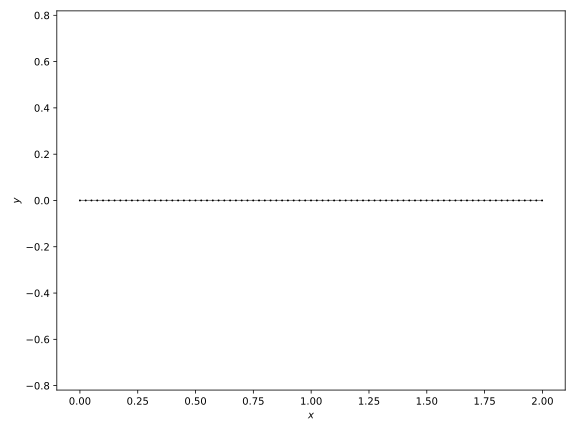

In [6]:
ps.plot_mesh(FINITE_ELEMENT, mesh_data)
display(SVG(filename="pre_processing/pictures/meshed_1d_domain_Triangle1_EntireDomain.svg"))

## Figure 2: Boundary conditions map

Arquivo salvo em: c:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF\ozg46_time_harmonic_1d\pre_processing\pictures\coordinates_map_Triangle1.svg


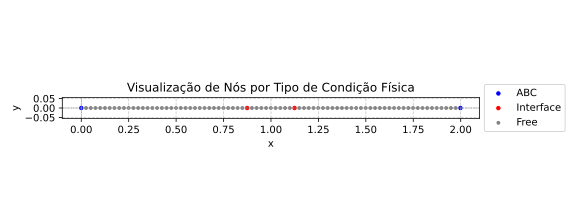

In [7]:
ps.plot_coordinates(FINITE_ELEMENT, mesh_data)
display(SVG(filename="pre_processing/pictures/coordinates_map_Triangle1.svg"))

## FEM Solution

### `local_matrices()`

In [8]:
def local_matrices(cell):
    # Initialize the local matrices
    Ne = len(cell['conn'])
    Se = np.zeros((Ne, Ne), dtype='complex128') # Matriz de rigidez do elemento
    Me = np.zeros((Ne, Ne), dtype='complex128') # Matriz de massa do elemento
    be = np.zeros((Ne, 1), dtype='complex128')  # Vetor de carga do elemento

    # Obter os pontos e pesos da quadratura de ordem 4
    points, weights = gauss_quad.general_1d(n=4)

    for xi, wk in zip(points, weights):
        pe = cell['p(x)']
        qe = cell['q(x)']
        fe = cell['f(x)']

        # Shape functions and derivatives
        phi = np.array([[1 - xi], [xi]])
        grad_phi = np.array([[-1, 1]])
        
        # Jacobian
        Je = cell['geo']['jacobian'] 
        
        # Determinante do Jacobiano
        Jdet, Jinv = abs(Je), 1/Je
        
        # Matriz de rigidez
        Se += (Jinv * grad_phi).T @ (pe * Jinv * grad_phi) * Jdet * wk

        # Produto externo para criar a matriz de massa M_ij 
        # phi @ phi.T = phi.T * phi = [[phi1*phi1, phi1*phi2], [phi2*phi1, phi2*phi2]]
        Me += qe * phi.T * phi * Jdet * wk

        # Element right-hand-side vector
        be += fe * phi * Jdet * wk
    
    return Se, Me, be

### `global_matrices()`

In [9]:
def global_matrices(mesh_data):
    # Inicializa a matriz global como uma matriz esparsa zero (tamanho NxN)
    Nnodes = len(mesh_data['nodes'])
    Sg = lil_matrix((Nnodes, Nnodes), dtype='complex128')
    Mg = lil_matrix((Nnodes, Nnodes), dtype='complex128')
    bg = lil_matrix((Nnodes, 1), dtype='complex128')

    # Início do processo de montagem
    for cell in mesh_data['cell'].values(): 
        Se, Me, be = local_matrices(cell)

        # loop sobre os nós locais de cada elemento
        for i, ig in enumerate(cell['conn']):
            ig = int(ig)-1
            for j, jg in enumerate(cell['conn']):
                jg = int(jg)-1
                Sg[ig, jg] += Se[i, j]
                Mg[ig, jg] += Me[i, j]
                
            # preenche o vetor global b
            bg[ig, 0] += be[i]

    return Sg, Mg, bg

### `apply_simple_abc()`

In [10]:
def apply_simple_abc(Sg, mesh_data):
    for key, node in mesh_data['nodes'].items():
        # Verifica se o nó é do tipo ABC
        if node['bc']['type'] == 'ABC':  
            e = int(key) - 1
            print(f"Applying ABC at node {key} with value {node['bc']['value']}")
            Sg[e, e] += node['bc']['value']

    return Sg

## Processor Module

In [11]:
# Montagem das matrizes globais
Sg, Mg, bg = global_matrices(mesh_data)
print("Global matrices shape:", Sg.shape)

# Aplicar condições de contorno ABC
Sg = apply_simple_abc(Sg, mesh_data)

# Matriz global resultante
Ag = Sg + Mg

# Vetor de potencial global
ug = spsolve(Ag.tocsr(), bg.toarray())
print("Global Potencial Vector shape:", ug.shape)

Global matrices shape: (81, 81)
Applying ABC at node 1 with value 6.287535065855045j
Applying ABC at node 4 with value 6.287535065855045j
Global Potencial Vector shape: (81,)


## Post-Processing

In [12]:
# Dicionário com os resultados
uh = {key+1: value for key, value in enumerate(ug)}

# Coeficientes de reflexão e transmissão
for key, node in mesh_data['nodes'].items():
    if node['bc']['name'] == 'x0':
        R_coeff = np.abs(uh[key])
        print(f"R_coeff = {R_coeff:.4f}")

    if node['bc']['name'] == 'xL':
        u_inc = np.exp(-1j * K0 * node['xg'][0])
        T_coeff = np.abs(u_inc + uh[key])
        print(f"T_coeff = {T_coeff:.4f}")

R_coeff = 0.2440
T_coeff = 0.8444


Arquivo salvo em: c:\Users\adilt\OneDrive\05_GIT\PPGEE-2024.2-MEF\ozg46_time_harmonic_1d\pos_processing\pictures\fem_solution_DielectricSlabDomain.svg


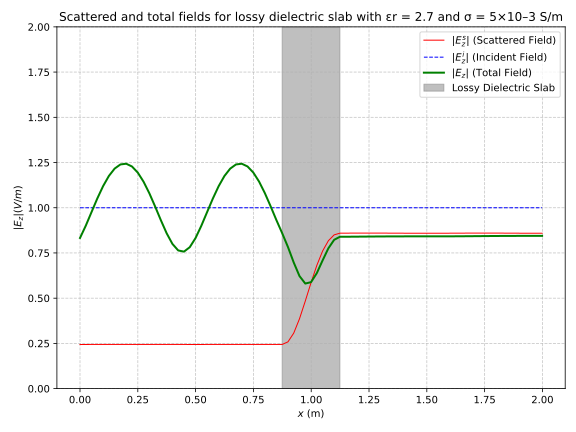

In [13]:
ps.plot_fem_solution(mesh_data, uh, domain='DielectricSlab')
display(SVG(filename="pos_processing/pictures/fem_solution_DielectricSlabDomain.svg"))

Conversão do arquivo Jupyter Notebook para um script Python: ``python -m nbconvert --to script name.ipynb``

Belo Horizonte, Brazil. 2025.  
Adilton Junio Ladeira Pereira - adt@ufmg.br  
&copy; All rights reserved.